C:\Users\ndsch\anaconda3\envs\Lifespan\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Log-rank test statistic: 0.17
Log-rank test p-value: 0.6843


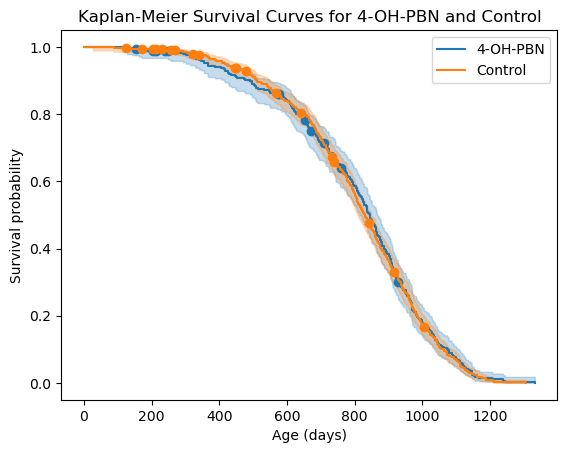

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Read the Excel file
file_path = r'C:\Users\ndsch\Data\ITP-Lifespan-Data\ITP_raw_data\Lifespan_C2004.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Filter data for the two groups of interest
group1_data = data[data['group'] == '4-OH-PBN']
group2_data = data[data['group'] == 'Control']

# Create a KaplanMeierFitter instance
kmf = KaplanMeierFitter()

# Fit the data and plot the Kaplan-Meier curve for group 1
kmf.fit(group1_data['age(days)'], event_observed=group1_data['dead'], label='4-OH-PBN')
ax = kmf.plot(show_censors=True, censor_styles={'marker': 'o', 'ms': 6})

# Fit the data and plot the Kaplan-Meier curve for group 2
kmf.fit(group2_data['age(days)'], event_observed=group2_data['dead'], label='Control')
kmf.plot(ax=ax, show_censors=True, censor_styles={'marker': 'o', 'ms': 6})

# Set plot labels and title
plt.xlabel('Age (days)')
plt.ylabel('Survival probability')
plt.title('Kaplan-Meier Survival Curves for 4-OH-PBN and Control')

# Perform log-rank test
results = logrank_test(group1_data['age(days)'], group2_data['age(days)'],
                       event_observed_A=group1_data['dead'],
                       event_observed_B=group2_data['dead'])
test_statistic, p_value = results.test_statistic, results.p_value

# Display log-rank test results
print(f'Log-rank test statistic: {test_statistic:.2f}')
print(f'Log-rank test p-value: {p_value:.4f}')

# Show the plot
plt.show()
